# analysis_d23b
Use functions in [**`d23b.py`**](d23b.py) to perform analysis and produce figures for _Modelling Correlation Between the Ice Sheet Components of Sea-Level Rise_.

Author: Benjamin S. Grandey, 2023–2024.

In [1]:
import datetime
import d23b
import matplotlib.pyplot as plt
from pathlib import Path
import pyvinecopulib as pv
import time

In [2]:
# Get start datetime
start_dt = datetime.datetime.now()

## Relationship between sources of uncertainty and model-based projections
The schematic is produced separately using [**schematic_fig_d23b.pptx**](schematic_fig_d23b.pptx): first, export from PowerPoint to `s01.pdf` (in `figs_d23b/s_pdf/`), then export `s01.pdf` to `s01.png` (in `figs_d23b/s_png/`).

In [3]:
# Are the .pdf and .png versions of the schematic more recent than the .pptx version?
schematic_pptx = Path('schematic_fig_d23b.pptx')
fig_name = f's{next(d23b.S_NUM):02}'  # name based on counter, then update counter (in prep for next fig)
schematic_pdf = Path(f'figs_d23b/s_pdf/{fig_name}.pdf')
schematic_png = Path(f'figs_d23b/s_png/{fig_name}.png')
for f in (schematic_pptx, schematic_pdf, schematic_png):
    try:
        print(f'{time.ctime(f.stat().st_mtime)}: {f.name}')
    except FileNotFoundError:
        print(f'Not found: {f.name}')

Tue Feb  6 12:37:38 2024: schematic_fig_d23b.pptx
Tue Feb  6 12:37:59 2024: s01.pdf
Tue Feb  6 12:38:38 2024: s01.png


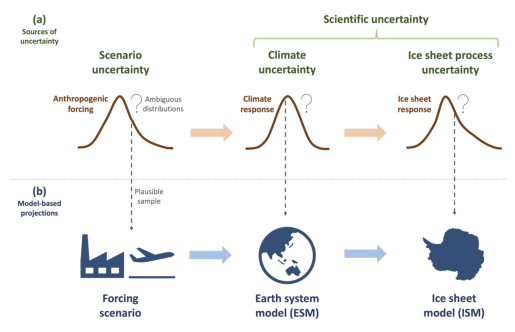

In [4]:
# Show schematic
plt.imshow(plt.imread(schematic_png))
plt.axis('off')
plt.show()

## Modelling correlation using copulas

read_ar6_samples(wf_1e, WAIS, ssp585, 2100): including PEN in WAIS
Written fig01.pdf (0.43 MB)
Written fig01.png (0.63 MB)


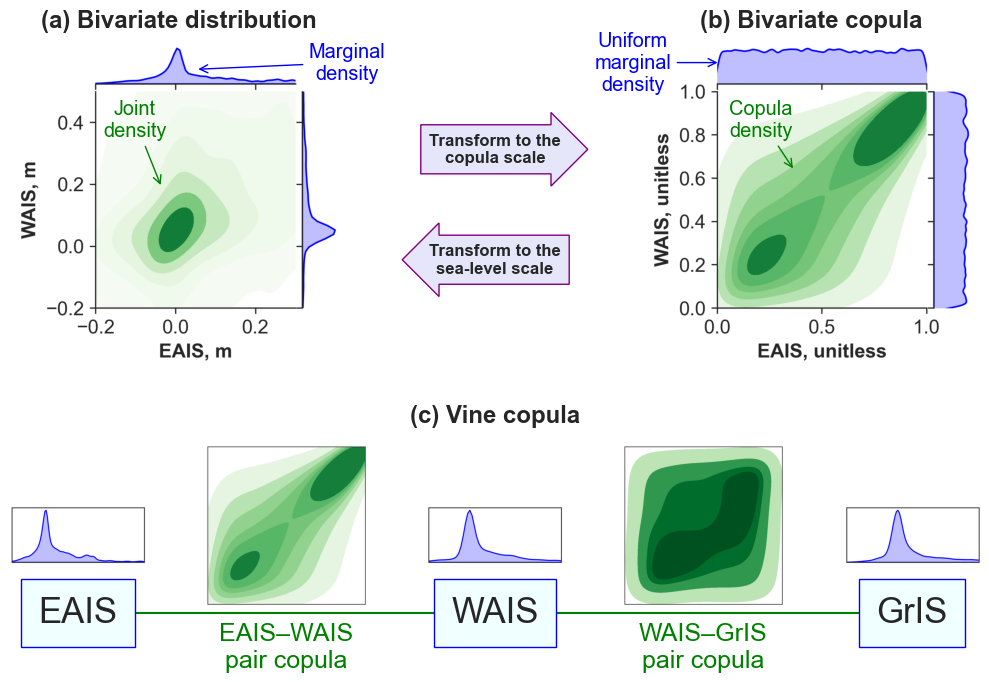

In [5]:
fig = d23b.fig_illustrate_copula()
_ = d23b.name_save_fig(fig, fso='f')

## ISM ensemble

Written fig02.pdf (0.04 MB)
Written fig02.png (0.16 MB)


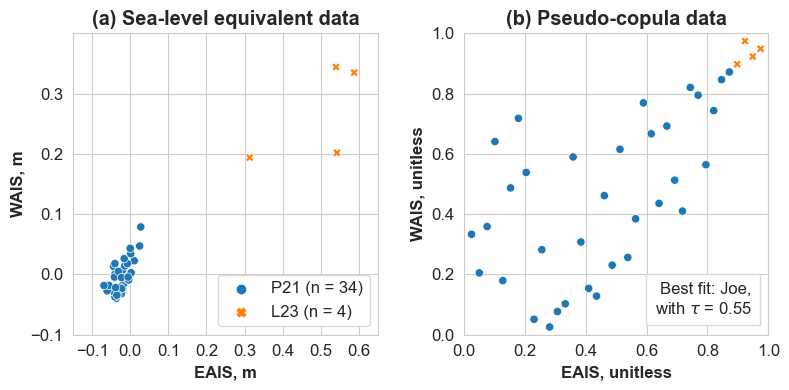

In [6]:
fig, axs = d23b.fig_ism_ensemble()
_ = d23b.name_save_fig(fig, fso='f')

## Summary of bivariate copulas

Written fig03.pdf (0.05 MB)
Written fig03.png (0.33 MB)


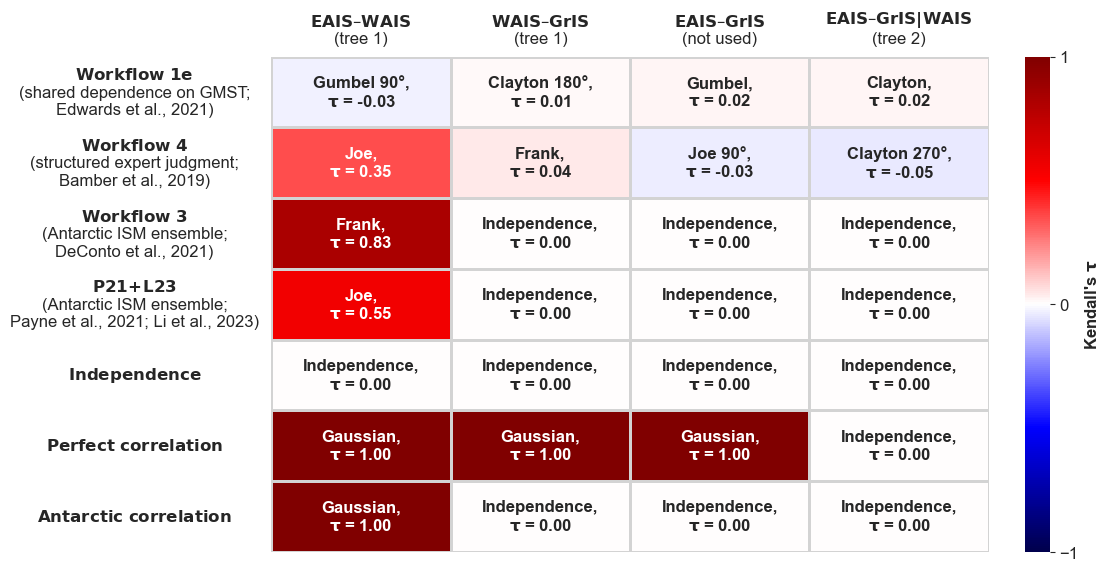

In [7]:
fig, axs = d23b.fig_dependence_table()
_ = d23b.name_save_fig(fig, fso='f')

## Marginals

Written s02.pdf (0.03 MB)
Written s02.png (0.17 MB)


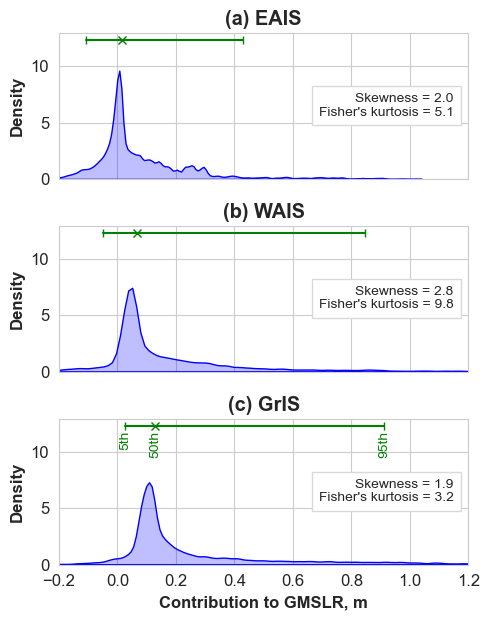

In [8]:
fig, _ = d23b.fig_component_marginals()
_ = d23b.name_save_fig(fig, fso='s')

## Influence of Kendall's tau and copula family

Written s03.pdf (0.03 MB)
Written s03.png (0.32 MB)


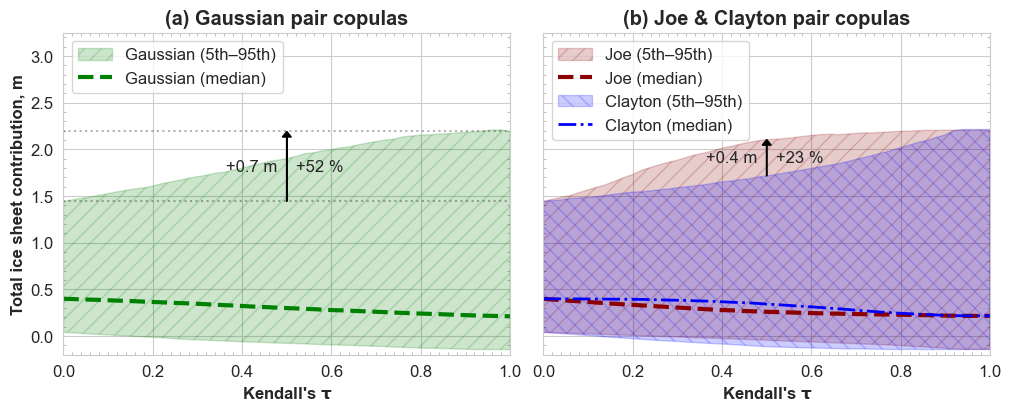

In [9]:
# Role of Kendall's tau and copula family
fig, axs = d23b.fig_total_vs_tau()
_ = d23b.name_save_fig(fig, fso='s')

Written o01.pdf (0.02 MB)
Written o01.png (0.11 MB)


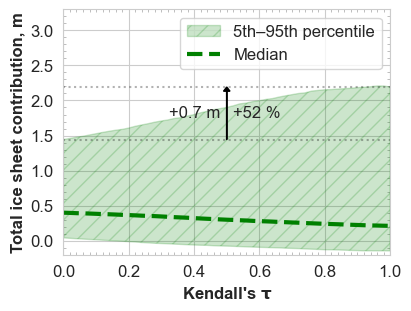

In [10]:
# Plot (a) again, for use in presentation
fig, ax = plt.subplots(1, 1, figsize=(4, 3), constrained_layout=True)
ax = d23b.ax_total_vs_tau(families=(pv.BicopFamily.gaussian, ), colors=('green', ), ax=ax)
ax.set_title('')
ax.set_ylim(-0.2, 3.3)
ax.legend(labels=['5th–95th percentile', 'Median'], fontsize='large')
_ = d23b.name_save_fig(fig, fso='o')

## Influence of correlation on projections

read_ar6_samples(wf_1e, WAIS, ssp585, 2020): including PEN in WAIS
read_ar6_samples(wf_1e, WAIS, ssp585, 2030): including PEN in WAIS
read_ar6_samples(wf_1e, WAIS, ssp585, 2040): including PEN in WAIS
read_ar6_samples(wf_1e, WAIS, ssp585, 2050): including PEN in WAIS
read_ar6_samples(wf_1e, WAIS, ssp585, 2060): including PEN in WAIS
read_ar6_samples(wf_1e, WAIS, ssp585, 2070): including PEN in WAIS
read_ar6_samples(wf_1e, WAIS, ssp585, 2080): including PEN in WAIS
read_ar6_samples(wf_1e, WAIS, ssp585, 2090): including PEN in WAIS
('1', '0'), 95th: 2.2 - 1.4 = 0.7 m (+52 %)
('1', '0'), 50th: 0.2 - 0.4 = -0.2 m (-47 %)
('10', '0'), 95th: 1.6 - 1.4 = 0.2 m (+14 %)
('10', '0'), 50th: 0.4 - 0.4 = -0.0 m (-12 %)
('wf_1e', '0'), 95th: 1.4 - 1.4 = 0.0 m (+0.4 %)
('wf_1e', '0'), 50th: 0.4 - 0.4 = -0.0 m (-0.6 %)
('wf_4', '10'), 95th: 1.6 - 1.6 = -0.1 m (-4 %)
('wf_4', '10'), 50th: 0.4 - 0.4 = 0.0 m (+2 %)
('wf_3e', '10'), 95th: 1.6 - 1.6 = -0.0 m (-0.3 %)
('wf_3e', '10'), 50th: 0.4 - 0.4 = 0.0 

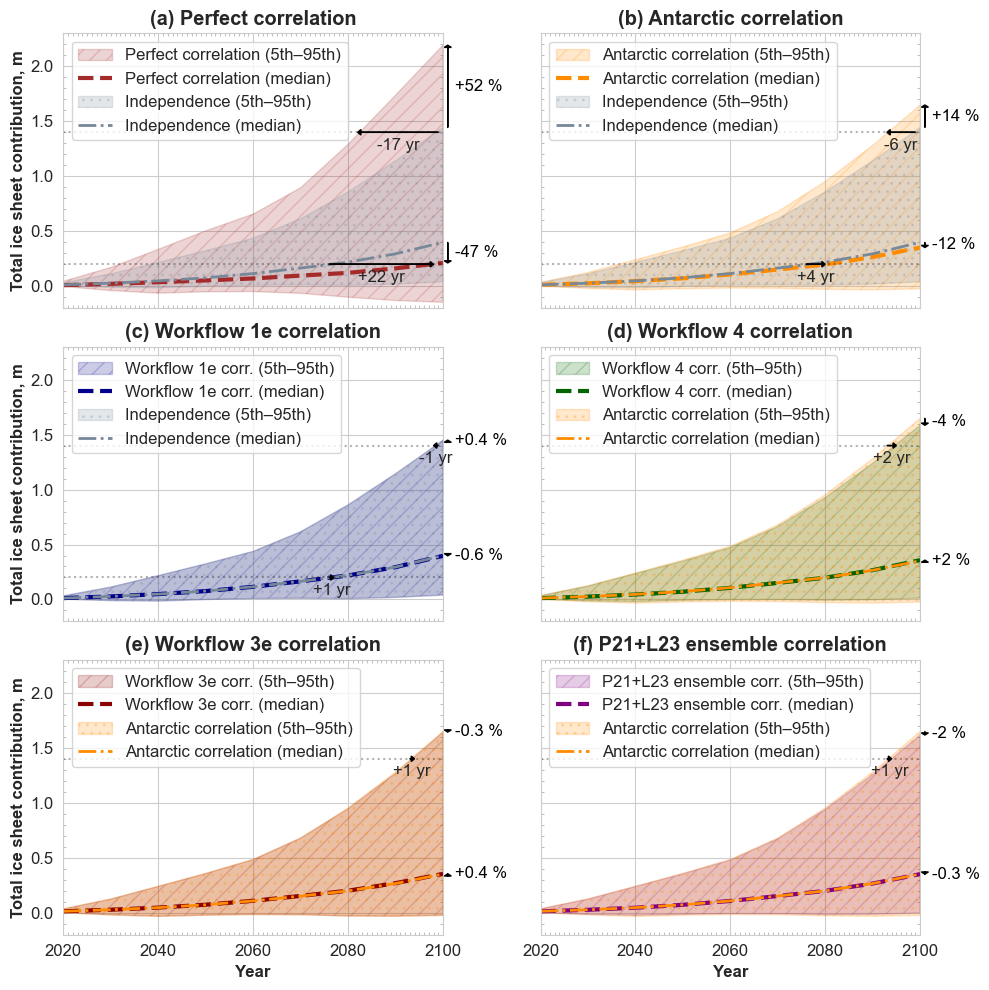

In [11]:
# Total vs time for six correlation structures
fig, axs = d23b.fig_total_vs_time()
_ = d23b.name_save_fig(fig, fso='f')

## Relative sea-level change

In [12]:
# GRD fingerprints for three locations
grd_df = d23b.get_grd_df()
grd_df.round(2)

,EAIS,WAIS,GrIS
REYKJAVIK,1.11,1.17,-1.70
DUBLIN,1.10,1.12,-0.04
TANJONG_PAGAR,1.11,1.14,1.12


Written s04.pdf (0.04 MB)
Written s04.png (0.30 MB)


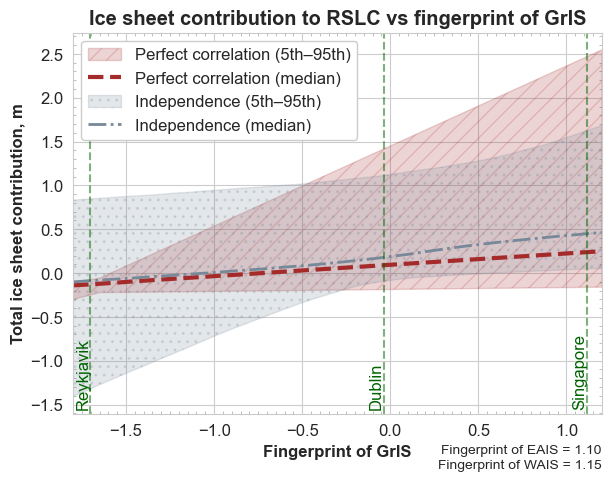

In [13]:
# Contribution to RSLC vs fingerprint of GrIS
fig, ax = plt.subplots(1, 1, figsize=(6, 4.7), constrained_layout=True)
ax = d23b.ax_sum_vs_gris_fingerprint(ax=ax)
_ = d23b.name_save_fig(fig, fso='s')

## Watermark and timing info

In [14]:
print(d23b.get_watermark())

Python implementation: CPython
Python version       : 3.10.11
IPython version      : 8.13.2

matplotlib   : 3.7.1
numpy        : 1.24.3
pandas       : 2.0.2
pyvinecopulib: 0.6.3
scipy        : 1.10.1
seaborn      : 0.12.2
xarray       : 2023.5.0

conda environment: d23b-ice-dependence

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 22.6.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit


In [15]:
# Get end datetime
end_dt = datetime.datetime.now()
# Calculate run timedelta
run_td = end_dt - start_dt
# Print timing information
print(f"Start:     {start_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"End:       {end_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Wall time: {run_td.seconds} s")

Start:     2024-04-02 20:28:04
End:       2024-04-02 20:29:17
Wall time: 72 s
